## This example shows Simulated Anealing on the benchmark data. 
http://decsai.ugr.es/~casillas/fmlib/ele2-4-1056.html

In [1]:
import numpy as np
import csv
import os
import sys
import matplotlib.pyplot as plt

import time

# add path of needed code 
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory+'/Code/')

from Fuzzification import cluster, scale
import Reader
import FIS

%matplotlib inline

In [2]:
path = parent_directory +'/Data/elec/'
file = 'ele2-4-1056-5.tra'
data = Reader.read_elec_data(path, file)
# The target column of your data
target_col = -1 # last column

In [3]:
# specify overlap of your sets, or the variance of the gaussian
overlap = 0.01
# Gaussian, triangle or trapezoid
mf = 'Gaussian'
# number of clusters per feature
Ncentroids = [10, 15, 25, 25, 45]
# A name for the FIS file
FIS_name='Demo_WM_elec'

## First test without SA

In [4]:
# train the FIS 
start = time.time()
FIS.train(FIS_name, data, target_col, mf, Ncentroids, overlap)
print('The training took: ', time.time() - start, 'seconds')

The training took:  0.7852380275726318 seconds


In [5]:
# read in the trained FIS
method, mf, overlap, target_centroids, feature_centroids, RB = FIS.read(FIS_name +'.FIS')

In [6]:
# test the trained fis
path = parent_directory +'/Data/elec/'
file = 'ele2-4-1056-5.tst'
test_data = Reader.read_elec_data(path, file)

In [7]:
start = time.time()
RMSE, MAE, _ = FIS.test(test_data, mf, overlap, target_centroids, feature_centroids, RB, target_col)
print('The testing took: ', time.time() - start, 'seconds', '\n')
print('The RMSE is: ', RMSE)
print('The MAE is: ' , MAE)
print('The number of rules is ', len(RB))

The testing took:  0.18211793899536133 seconds 

The RMSE is:  11908.5627717
The MAE is:  76.8763225281
The number of rules is  224


## Test with SA, with a rule reduction of 20%

In [8]:
# specify SA properties
sa_alpha = 0.8 # keep 80 percent of the rules
sa_flag = True
sa_iterations = 200
sa_plot = True
# A name for the FIS file
FIS_name='Demo_SA_elec'

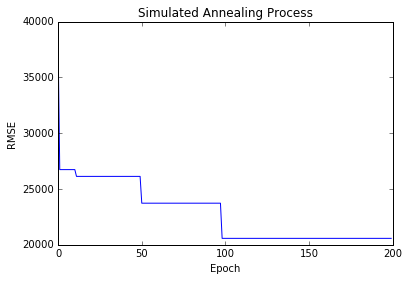

The training took:  149.18697690963745 seconds 



In [9]:
# train the FIS 
start = time.time()
FIS.train(FIS_name, data, target_col, mf, Ncentroids, overlap, 
          alpha = sa_alpha , sa = sa_flag, iterations = sa_iterations, sa_plot = sa_plot)
print('The training took: ', time.time() - start, 'seconds', '\n')

In [10]:
# read in the trained FIS
method, mf, overlap, target_centroids, feature_centroids, RB = FIS.read(FIS_name +'.FIS')

In [11]:
start = time.time()
RMSE, MAE, _ = FIS.test(test_data, mf, overlap, target_centroids, feature_centroids, RB, target_col)
print('The testing took: ', time.time() - start, 'seconds', '\n')
print('The RMSE is: ', RMSE)
print('The MAE is: ' , MAE)
print('The number of rules is ' , len(RB))

The testing took:  0.1491241455078125 seconds 

The RMSE is:  29528.2763733
The MAE is:  108.260314317
The number of rules is  179
